In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# set default figure size
plt.rcParams['figure.figsize'] = [6, 4]
# set tick label size 
plt.rcParams.update({'font.size': 10})
# set x any y label size and title size
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'axes.titlesize': 15})
# add grid by default
plt.rcParams['axes.grid'] = True
# set legend size to 10
plt.rcParams.update({'legend.fontsize': 12})
# set tick label font sie
plt.rcParams.update({'xtick.labelsize': 12})
plt.rcParams.update({'ytick.labelsize': 12})

In [34]:
def f0(x):
    return x * (1-x)/2 + x**2*(1-x) - 0.1

def f(x, T):
    x1 = np.mod(x, T)
    return f0(x1/T)



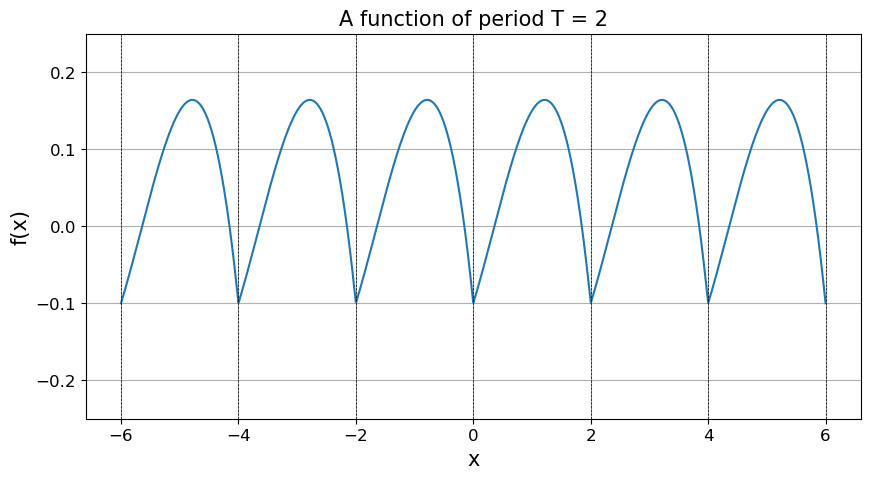

In [35]:
x_max  = 6
x = np.linspace(-x_max, x_max, 2000)
T = 2
y = f(x, T)
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(-.25, .25)
for j in range(-x_max//T, (x_max+T)//T):
    plt.axvline(x=j*T, color='k', linestyle='--', linewidth=0.5)
plt.title('A function of period T = 2')
plt.savefig('periodic_function.pdf')
plt.show()

In [41]:
# brute force numerical computation of Fourier expansion
def fourier_coefficients(f, T, N, x):
    c = np.zeros(2*N+1, dtype=complex)
    for n in range(-N, N+1):
        c[n+N] = 1/T * np.trapz(f(x, T) * np.exp(-1j*2*np.pi*n*x/T), x)
        
    return c
    
def fourier_series(c, N, x):
    Nmax = (len(c) - 1) // 2
    assert Nmax >= N
    f = np.zeros_like(x, dtype=complex)
    for n in range(-N, N+1):
        f += c[n+Nmax] * np.exp(1j*2*np.pi*n*x/T)
        
    return f

In [133]:
def square_wave(t, T):
    return 0.5 * (np.sign(np.sin(2*np.pi/T*t)) + 1)

def triangle_wave(t, T):
    x = np.mod(t, T)
    return 1 - 2*np.abs(x - 0.5*T)/(0.5*T)

def sawtooth_wave(t, T):
    x = np.mod(t, T)
    return 2*x/T - 1

def weird_wave(t,T):
    x = np.mod(t+1e-6, T)
    return np.sin(T/x)

In [144]:

f = square_wave

periods = 3
resolution = 10000
x = np.linspace(0,periods*T, periods*resolution)
t = np.linspace(0, T, resolution)
c = fourier_coefficients(f, T, 100, t)



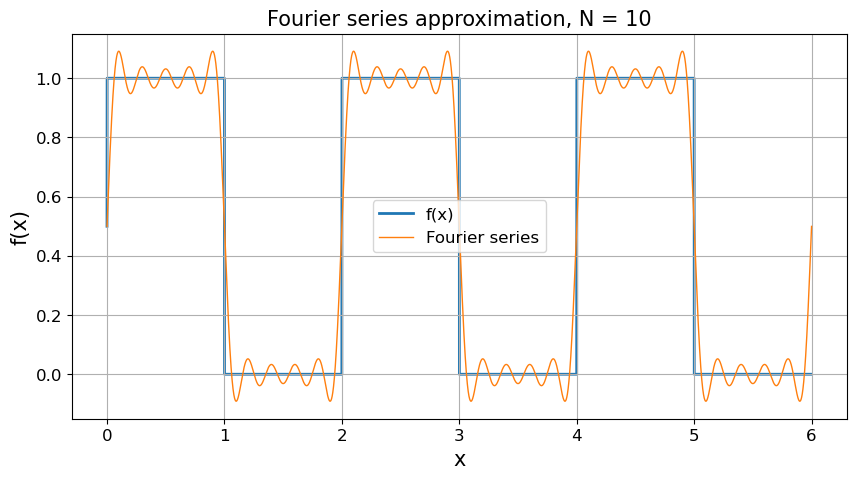

In [148]:
N = 10
f_approx = fourier_series(c, N, x)
plt.figure(figsize=(10, 5))
plt.plot(x, f(x, T).real, label='f(x)', zorder=0, linewidth=2)
plt.plot(x, f_approx.real, label='Fourier series', linewidth=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'Fourier series approximation, N = {N}')
plt.savefig('fourier_series_approx.pdf')
plt.show()


In [110]:
def weird_series(N):
    np.random.seed(42)
    c = np.zeros(2*N+1,dtype=complex)
    for n in range(N):
        coeff = 1/(n+1) * np.exp(2j*np.pi*np.random.rand(1))
        c[n+N] = coeff[0]
        c[N-n] = coeff[0].conj()
        
    return c
        

        

In [111]:
c = weird_series(1000)

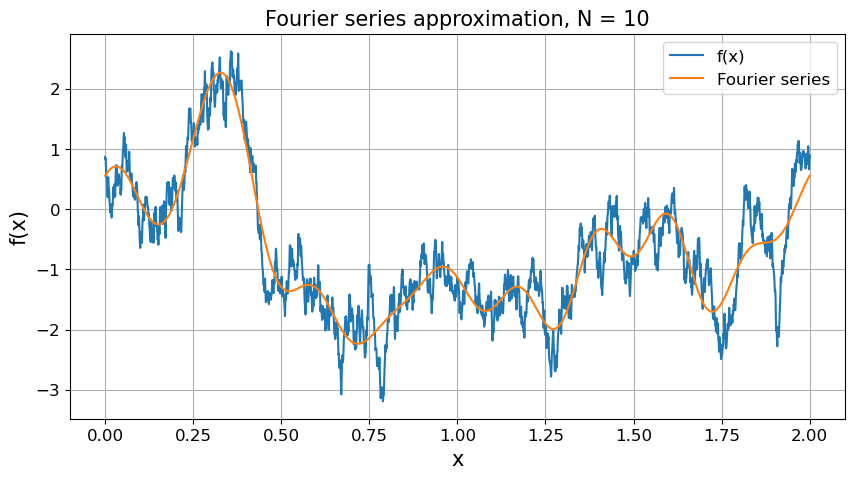

In [114]:
N = 10
f_approx = fourier_series(c, N, t)
f = fourier_series(c, 1000, t)
plt.figure(figsize=(10, 5))
plt.plot(t, f.real, label='f(x)')
plt.plot(t, f_approx.real, label='Fourier series')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title(f'Fourier series approximation, N = {N}')
plt.savefig('fourier_series_approx.pdf')
plt.show()